# Random Graph Experimentation - Comparing RobustPC variants vs PC algorithm

We hypothesize that RobustPC in the context of **faithful** and/or **m-strong-faithful** graphs will perform better than the naive PC algorithm. The baseline CPDAG we want to compare to is the one using a ParentOracle, which is uniformly consistent for all graphs.

We have the following comparisons that leverage the momentary conditional independence condition (MCI), which leverages a fixed conditioning set in addition to that suggested via PC:

    - definite parents: Using a parent oracle
    - definite children: Using a children oracle
    - definite parents + definite children: Using a parent + children oracle
    - definite Markov blanket: Using the markov blanket oracle
    - estimated parents: using "some" procedure to estimate the parents
    - estimated parents + children: using "some" procedure to estimate the parents+children
    - estimated markov blanket: estimating the markov blanket
    
References
----------
[1] https://www.jmlr.org/papers/volume9/pellet08a/pellet08a.pdf

In [1]:
%load_ext lab_black

In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
import os
from pathlib import Path
from pprint import pprint
import json

import numpy as np
import bnlearn as bn
import networkx as nx
import pandas as pd

import causal_networkx
from causal_networkx.ci import (
    g_square_discrete,
    fisherz,
    g_square_binary,
    Oracle,
    ParentOracle,
)
from causal_networkx.discovery import PC, RobustPC
from causal_networkx.io import read_dot, load_from_networkx

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
np.random.seed(12345)

# Set up to load the data

The data should have been previously generated via the manm_cs package for additive noise models. We will load the data in with specific parameters.

In [12]:
data_dir = Path("/Volumes/Extreme Pro/structure_learning_manm_sim")

In [31]:
print(df.shape)
df = df.sample(2000)
print(df.shape)

(500000, 9)
(2000, 9)


{'idx': 310, 'n_nodes': 8, 'n_samples': 500000, 'edge_density': 0.5, 'discrete_node_ratio': 0.0, 'conditional_gaussian': True, 'discrete_signal_to_noise_ratio': 0.9, 'min_discrete_value_classes': 3, 'max_discrete_value_classes': 4, 'continuous_noise_std': 0.1, 'beta_lower_limit': 0.5, 'beta_upper_limit': 1.0, 'functions_prob': [1.0], 'functions': 'linear'}


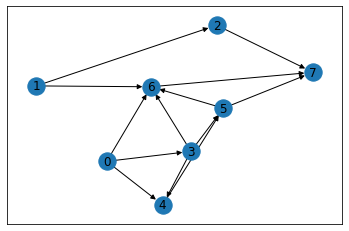

In [27]:
for idx in range(310, 320):
    data_fname = data_dir / f"graph_{idx}.csv"
    graph_fname = data_dir / f"graph_{idx}.gml"
    meta_fname = data_dir / f"graph_{idx}.json"

    # load the actual data
    df = pd.read_csv(data_fname)
    nx_graph = nx.read_gml(graph_fname)
    true_graph = load_from_networkx(nx_graph)
    with open(meta_fname, "r") as fin:
        meta_dict = json.load(fin)

    # sub-sample data
    df = df.sample(2000)
        
    # run the PC algorithm with Oracle
    oracle = Oracle(true_graph)
    pc_oracle = PC(
        ci_estimator=oracle.ci_test
    )
    pc_oracle.fit(df)
    
    # run the PC algorithm with partial correlation
    pc_alg = PC(ci_estimator=parcorr)
    
    # run the RobustPC algorithm with partial correlation
    robustpc = RobustPC(ci_estimator=parcorr)
    
    # run the RobustPC algorithm with ParentOracle
        
    # true_graph.draw()
    # print(true_graph)
    # print(meta_dict)
    break

In [30]:
print(true_graph.edges)

[('0', '3'), ('0', '4'), ('0', '6'), ('1', '2'), ('1', '6'), ('2', '7'), ('3', '4'), ('3', '5'), ('3', '6'), ('4', '5'), ('5', '6'), ('5', '7'), ('6', '7')]
True
